In [1]:
# Basic  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
import os
import seaborn as sns

In [2]:
# Standard libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras import optimizers
from keras.models import Model
from keras.preprocessing.image import array_to_img, img_to_array

In [3]:
train_df=pd.read_csv('train.csv')

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.shape

(42000, 785)

In [6]:
train_df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

## Data Visualisation

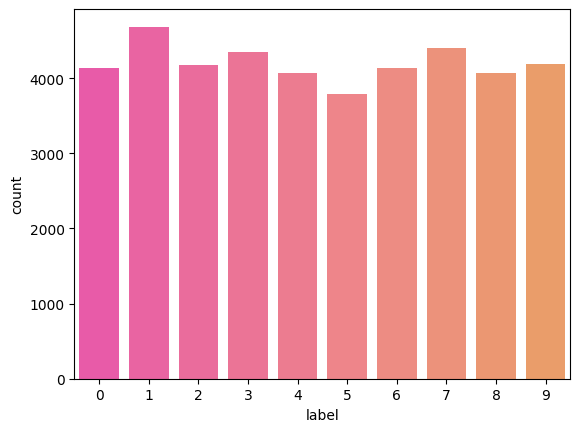

In [7]:
ax = sns.countplot(x=train_df['label'],  
                    palette=sns.color_palette('blend:#F4A,#F95', as_cmap=True),
                    hue=train_df['label'],
                    legend=False)

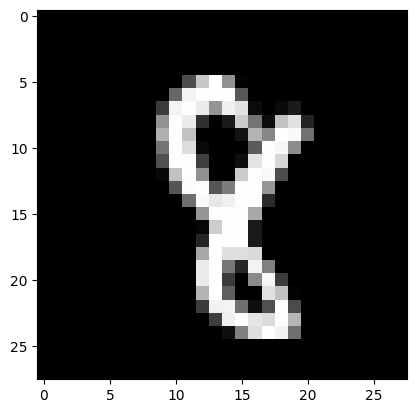

In [8]:
digit = train_df.iloc[6969,1:]
digit = digit.values.reshape(28,28)
plt.imshow(digit, cmap='gray')

## Data Preprocessing

In [16]:
y=train_df['label']
# train_df.drop(['label'],inplace=True,axis=1)

In [17]:
train_df.shape

(42000, 785)

In [18]:
x=train_df

In [19]:
x

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
x=x/255.0

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=10)

## Training and Testing on Different ML ALGORITHM 

In [22]:
##importing libaries
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [23]:
# linear model
model1 = SVC(kernel='linear')
model1.fit(X_train, Y_train)
# predict
y_pred = model1.predict(X_test)
print("accuracy using SVC :", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

accuracy using SVC : 0.9303968253968254 



In [24]:
model2=LogisticRegression(solver='lbfgs', max_iter=1000)
model2.fit(X_train,Y_train)
predication=model2.predict(X_test)
accuracy=accuracy_score(Y_test,predication)
print("accuracy using LogisticRegression",accuracy*100)

accuracy using LogisticRegression 91.86507936507937


In [25]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=10)
model2.fit(X_train,Y_train)
predication=model2.predict(X_test)
accuracy=accuracy_score(Y_test,predication)
print("accuracy using RandomForestClassifier",accuracy*100)

accuracy using RandomForestClassifier 89.84126984126985


## Training and Testing Using CNN

In [37]:
train_df2=pd.read_csv('train.csv')
train_df2.shape

(42000, 785)

In [38]:
x = train_df2.iloc[:, 1:].values.reshape(-1, 28, 28, 1).astype('float32')    #reshape the data
x=x/255.0     #normalising the data 
y = to_categorical(train_df2.iloc[:, 0].values)

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [40]:
model=Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
# Train the model
history=model.fit(X_train, Y_train, epochs=150, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/150
460/460 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7497 - loss: 0.7583 - val_accuracy: 0.9723 - val_loss: 0.0838
Epoch 2/150
460/460 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9623 - loss: 0.1173 - val_accuracy: 0.9837 - val_loss: 0.0504
Epoch 3/150
460/460 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9736 - loss: 0.0811 - val_accuracy: 0.9853 - val_loss: 0.0418
Epoch 4/150
460/460 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9800 - loss: 0.0613 - val_accuracy: 0.9858 - val_loss: 0.0441
Epoch 5/150
460/460 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9835 - loss: 0.0516 - val_accuracy: 0.9883 - val_loss: 0.0375
Epoch 6/150
460/460 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9853 - loss: 0.0453 - val_accuracy: 0.9898 - val_loss: 0.0318
Epoch 7/150
460/460 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9872 - loss: 0.0380 - val_accuracy: 0.9899 - val_loss: 0.0321
Epoch 8/150
460/460 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9865 - loss: 0.0381 

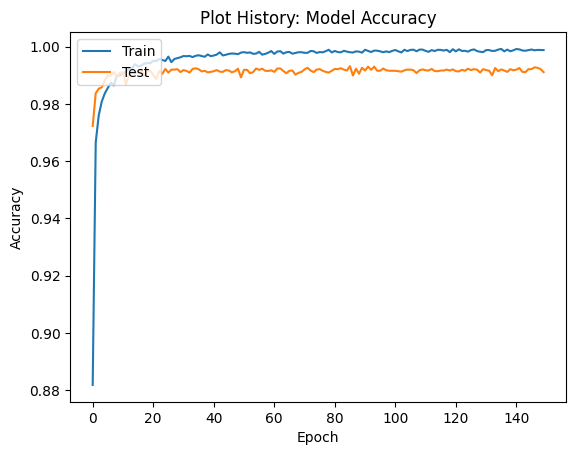

In [44]:
# plot the accuracy and loss
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Plot History: Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

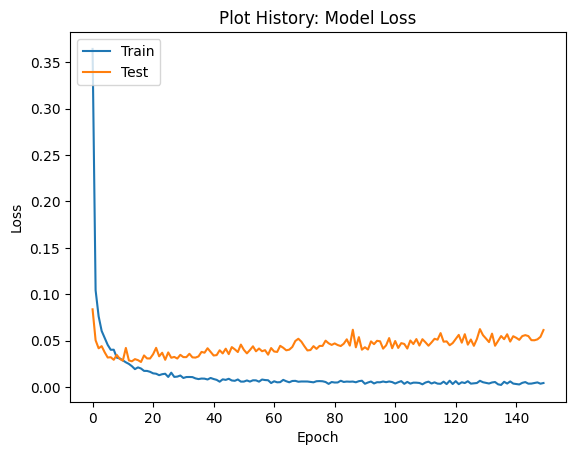

In [45]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Plot History: Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [46]:
test_data = pd.read_csv('test.csv')

# Preprocess the test dataset
X_test = test_data.values.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to labels
predicted_labels = np.argmax(predictions, axis=1)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'ImageId': range(1, len(predicted_labels) + 1),
                              'Label': predicted_labels})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission3.csv', index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
